# Can we discover some interesting from the Titanic dataset? Can we demonstrate good and bad examples....

This notebook uses the [Titanic dataset](https://www.kaggle.com/competitions/titanic/data?select=test.csv). It contains the list of passengers and information collated.  We are assuming, at the time of writing, no individual listed on this dataset are still alive, therefore, the data protection act and other legistation should not apply to the data. However, the author will do their best to preserve privacy.

Further information about the Titanic ship and disaster can be found on [Wikipedia](https://en.wikipedia.org/wiki/TitanicWikipedia) and [Google Scholar](https://scholar.google.co.uk/scholar?hl=en&as_sdt=0%2C5&q=titanic+sinking&oq=Titanic+) provides peer-reviewed publications. 

This notebook also simulate some suitable and unsuitable use of analytical techniques. The titanic data did not demonstrate such features.  

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit

from scipy.stats import f_oneway
from scipy import stats
%matplotlib inline

# Understanding the data

Understanding the data and its structure should be the main concern at the early stages of data exploration.  Understanding about the data structure as well as its properties assists on selecting the type of analytical processes for the purpose of pre-processing and analysing and predicting. 

Meta-data describes the data itself, i.e., it is some data about data. For example, databases use some schemas or column’s description for datasets.  Meta-data should also inform about the source of the data to support its management and our judgement of reliability. 

Meta-data should support justification for selecting subset within a dataset to produce an analysis, creating a report, producing a graph. An example is provided in Figure X. Meta-data is often communicated in tables, diagrams or using a markup language. Data manager or analyst are often considered as  the targeted audience, as they expect some descriptive, data type, and sometimes some dimensions. 

## data source


The dataset has been obtained from [Kaggle](https://www.kaggle.com/competitions/titanic/data?select=test.csv). It is free to use.   We upload the data, explore the meta-data of both datasets. 

https://www.openml.org/search?type=data&sort=runs&id=40945&status=active

We discover the training dataset has a survivor column, which the test dataset has not. The training dataset is also much larger than the test dataset, which is expected for machine learning exploration. 

In [2]:
!ls data

data.csv  test.csv  train.csv


## upload data and explore meta-data


In [3]:
train = pd.read_csv("data/train.csv")
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train.shape

(891, 12)

In [5]:
train.sort_values(by="Ticket").head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S


In [6]:
test = pd.read_csv("data/test.csv")
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test.shape

(418, 11)

In [8]:
test.sort_values(by="Ticket").head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
335,1227,1,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.00,C106,S
158,1050,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.55,D22,S
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.25,D37,C
191,1083,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.00,NaN,S
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.00,NaN,S


We use instead a [complete dataset](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active). 

In [9]:
data = pd.read_csv("data/data.csv")
data.dtypes

'pclass'        int64
'survived'      int64
'name'         object
'sex'          object
'age'          object
'sibsp'         int64
'parch'         int64
'ticket'       object
'fare'         object
'cabin'        object
'embarked'     object
'boat'         object
'body'         object
'home.dest'    object
dtype: object

In [10]:
data.dtypes

'pclass'        int64
'survived'      int64
'name'         object
'sex'          object
'age'          object
'sibsp'         int64
'parch'         int64
'ticket'       object
'fare'         object
'cabin'        object
'embarked'     object
'boat'         object
'body'         object
'home.dest'    object
dtype: object

In [11]:
data.shape


(1309, 14)

In [12]:
data.sort_values(by="'ticket'").head(5)

,'pclass','survived','name','sex','age','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'
67,1,1,"Cherry, Miss. Gladys",female,30,0,0,110152,86.5,B77,S,8,?,"London, England"
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33,0,0,110152,86.5,B77,S,8,?,"London Vancouver, BC"
195,1,1,"Maioni, Miss. Roberta",female,16,0,0,110152,86.5,B79,S,8,?,?
289,1,1,"Taussig, Miss. Ruth",female,18,0,2,110413,79.65,E68,S,8,?,"New York, NY"
291,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39,1,1,110413,79.65,E67,S,8,?,"New York, NY"


We chose data and surmise this data set has contains all the train and test dataset.  

## Summarising the data

Data summary often complements meta-data; it informs about the features and properties of columns of a dataset. Analysts are keen to use descriptive statistical summaries and present them into tables; an example of a data summary is shown in figure X.   

Analysts can compute and communicate measures of extremes, centrality, and variability. The centre represents the halfway point of the observations – we often use the mean, the median, or both. The spread informs about the variability of the data. A small standard deviation, or interquartile range (IQR) may suggest the observations are clustered around a single value.  Otherwise, some outliers may exist and affect the mean and the standard deviation.

We first explore numerical values and their statistical descriptive summary. 


In [13]:
data.describe()

,'pclass','survived','sibsp','parch'
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


We list the unique values of the other columns. 

In [14]:
data["'pclass'"].unique().shape

(3,)

In [15]:
data["'survived'"].unique().shape

(2,)

In [16]:
data["'sex'"].unique().shape

(2,)

In [17]:
data["'embarked'"].unique().shape

(4,)

In [18]:
data["'sibsp'"].unique().shape

(7,)

In [19]:
data["'parch'"].unique().shape

(8,)

In [20]:
data["'fare'"].unique().shape


(282,)

In [21]:
data["'home.dest'"].unique().shape

(370,)

## Statistical distribution

Statistical distributions arrange some observations or values from the smallest to the largest value. Distributions are visually represented with some histograms; each bin (a bar on the histogram) counts the number of values within a subset of values.  Our choice of number of bins can bring a level of granularity and clarity.

Figure X1 has the lowest number of bins, which shows the data in with large bins. It is not easy to appreciate how the data is distributed; it is quite  incomprehensible.  However, when we increase the number of bins, the quality of the visual representation improves. A clearer shape arises, a perfect bell shape, in this case, is shown.

In this example, we replace all the unknown values with a negative fare. It is better than 0. 


In [22]:
data["'fare'"].unique()

array(['211.3375', '151.55', '26.55', '77.9583', '0', '51.4792',
       '49.5042', '227.525', '69.3', '78.85', '30', '25.925', '247.5208',
       '76.2917', '75.2417', '52.5542', '221.7792', '26', '91.0792',
       '135.6333', '35.5', '31', '164.8667', '262.375', '55', '30.5',
       '50.4958', '39.6', '27.7208', '134.5', '26.2875', '27.4458',
       '512.3292', '5', '47.1', '120', '61.175', '53.1', '86.5', '29.7',
       '136.7792', '52', '25.5875', '83.1583', '25.7', '71', '71.2833',
       '57', '81.8583', '106.425', '56.9292', '78.2667', '31.6792',
       '31.6833', '110.8833', '26.3875', '27.75', '263', '133.65', '49.5',
       '79.2', '38.5', '211.5', '59.4', '89.1042', '34.6542', '28.5',
       '153.4625', '63.3583', '55.4417', '76.7292', '42.4', '83.475',
       '93.5', '42.5', '51.8625', '50', '57.9792', '90', '30.6958', '80',
       '28.7125', '25.9292', '39.4', '45.5', '146.5208', '82.1708',
       '57.75', '113.275', '26.2833', '108.9', '25.7417', '61.9792',
       '66.6', 

In [23]:

fares = data["'fare'"]
fares = fares.replace('?', "-1")
fares = fares.astype(float)
fares.describe()

count    1309.000000
mean       33.269280
std        51.747562
min        -1.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: 'fare', dtype: float64

We replace the negative values with the values 9999. It will support log 10.

In [24]:
fares = fares.replace(-1, 999)
fares[fares == 999].count()

1

In [25]:
fares = fares.replace(0, 1e-10)
fares[fares == 1e-10 ].count()

17

__Incomprensible distribution__

count    1.309000e+03
mean     3.403322e+01
std      5.821815e+01
min      1.000000e-10
25%      7.895800e+00
50%      1.445420e+01
75%      3.127500e+01
max      9.990000e+02
Name: 'fare', dtype: float64

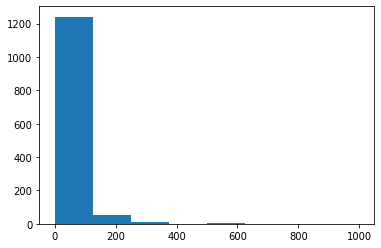

In [26]:
plt.hist(fares, bins = 8)
fares.describe()


__A more comprensible distribution__

count    1.308000e+03
mean     3.329548e+01
std      5.175867e+01
min      1.000000e-10
25%      7.895800e+00
50%      1.445420e+01
75%      3.127500e+01
max      5.123292e+02
Name: 'fare', dtype: float64

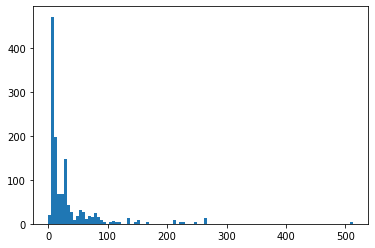

In [27]:
fares = fares[fares < 999]
plt.hist(fares, bins = 100)
fares.describe()


__An even more  comprehensible histogram:__
    
[Logarithms explained](https://www.mathsisfun.com/algebra/exponents-logarithms.html)

We appear to have zoomed in the distribution and see more peaks. So the distribution is multi-modal, with a tendency to have a lot of low fares.

count    1291.000000
mean       33.733917
std        51.956349
min         3.170800
25%         7.925000
50%        14.500000
75%        31.331250
max       512.329200
Name: 'fare', dtype: float64

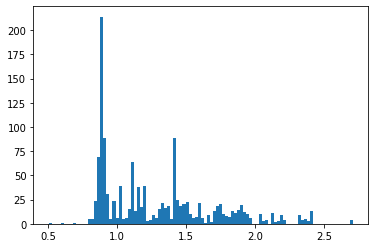

In [28]:
fares = fares[fares > 1e-10]
plt.hist(np.log10(fares), bins = 100)
fares.describe()



__Age:__

Some values are missing so the use again some values to remove those.


In [29]:
ages = data["'age'"]
ages = ages.replace ("?", 999)
ages = ages.astype(float)
ages.describe()

count    1309.000000
mean      224.593328
std       388.674258
min         0.166700
25%        22.000000
50%        32.000000
75%        55.000000
max       999.000000
Name: 'age', dtype: float64

The number of missing ages is quite large, and affecting negatively the distribution. 


So any analysis will be affected by this situation. Some inputation may help alleviate the negative impact to a certain extend. 

The distribution is therefore spurious, but indicative nonetheless.


In [30]:
ages[ages == 999].count()

263

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: 'age', dtype: float64

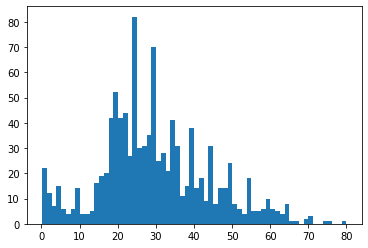

In [31]:
ages = ages[ages < 999]
plt.hist(ages, bins = 64)
ages.describe()

__Siblings or spouse__

Many passenger may have travelled on their own without any siblings or spouse. Many passengers also travelling without any children or parents. We surmise not many families may have been travelling on the Titanic.

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: 'sibsp', dtype: float64

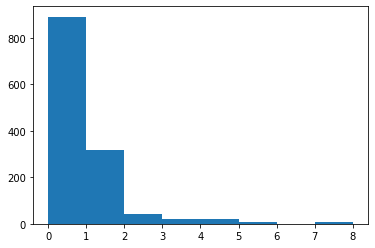

In [32]:
plt.hist(data["'sibsp'"], bins = 8)
data["'sibsp'"].describe()

__Parent or children:__

Some passengers travelled with their parents or their children.

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: 'parch', dtype: float64

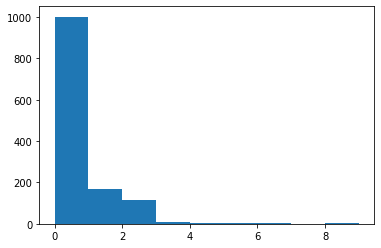

In [33]:
plt.hist(data["'parch'"], bins = 9)
data["'parch'"].describe()

More examples of histogram using the other columns. Some of these columns appeared to be catetorical. So, we chose the number of bins as the number of values. (see above).

__Passenger class:__

count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: 'pclass', dtype: float64

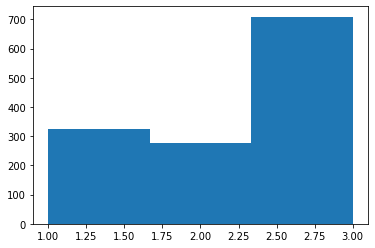

In [34]:
plt.hist(data["'pclass'"], bins = 3)
data["'pclass'"].describe()

__Survived or perished:__


More passengers would have perished the accident than survived. It is a shocking statistic.

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 'survived', dtype: float64

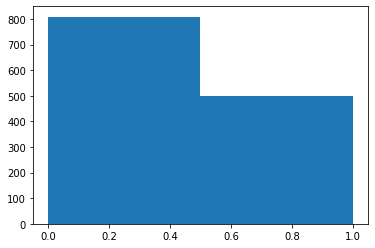

In [35]:
plt.hist(data["'survived'"], bins = 2)
data["'survived'"].describe()

__Gender:__

There was more male passengers than females passengers.

count     1309
unique       2
top       male
freq       843
Name: 'sex', dtype: object

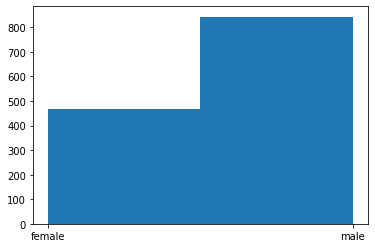

In [36]:
plt.hist(data["'sex'"], bins = 2)
data["'sex'"].describe()

__Port of embarkment:__

A majority of passenger would have emberbaked at Southampton, then Cherbourg. A minority of embarkation port is unknown.

count     1309
unique       4
top          S
freq       914
Name: 'embarked', dtype: object

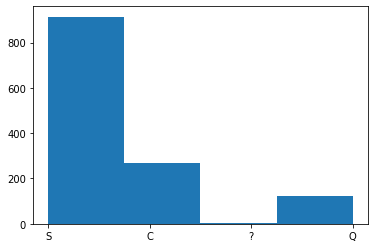

In [37]:
plt.hist(data["'embarked'"], bins = 4)
data["'embarked'"].describe()

# Analysing

Analysing data often requires using more than one statistical observation or column of a dataset. Analysing data can therefore use more than one technique to discover patterns, relationship and possibly make some predictions. Consequently, we use more data and complex techniques

## Comparison of data

We sometimes want to compare data grouped by a certain category or compare several datasets with the same observations (or columns).  A comparison becomes informative when the centre, the spread, the shape, and other unusual features are computed.  We introduced those in the previous section.

We are going to discuss and show how data summaries and boxplot can support us in communicating comparison of data.


In [38]:
fares = data["'fare'"]
fares = fares.replace("?", "-1")
fares = fares.astype(float)
data["'fare'"] = fares
data["'fare'"].dtypes

dtype('float64')

We create a table that compares the fares for each class. We discover most unknown fares in third class, which will negatively impact any analysis and comparison. It appears that some First and second class passengers may have been travelling free.

In [39]:
data[["'pclass'","'fare'"]].groupby("'pclass'").describe()


'fare'                                                         \
          count       mean        std  min      25%      50%       75%   
'pclass'                                                                 
1         323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625   
2         277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   
3         709.0  13.282715  11.498791 -1.0   7.7500   8.0500   15.2458   

                    
               max  
'pclass'            
1         512.3292  
2          73.5000  
3          69.5500

<AxesSubplot:title={'center':"'fare'"}, xlabel="['pclass']">

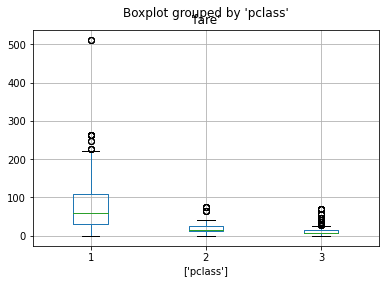

In [40]:
class_fare = data[["'pclass'","'fare'"]]
class_fare.boxplot(by="'pclass'")

If we wish to zoom in our data, we could apply the log of 10 to the fares. However, we need need to consider all fees paying passengers. We can now compare the fares against each passenger class. It appears that first class passengers may have generally payed more than lower classes.

<AxesSubplot:title={'center':"'fare'"}, xlabel="['pclass']">

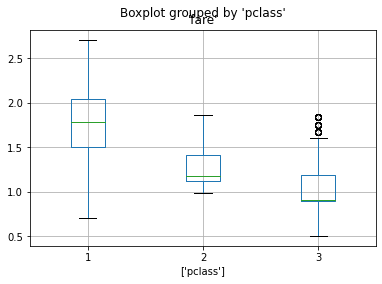

In [41]:
class_fare = data.loc[data["'fare'"] > 0, ["'pclass'","'fare'"]]
class_fare["'fare'"] = (np.log10(class_fare["'fare'"]))
class_fare.boxplot(by="'pclass'")

## Changes over time

Some datasets record the time when some observations were made. We sometimes want to explore and discover pattern of changes over a period of time; i.e., increases, decreases, or no changes.

Line graphs can show variations and compare different behaviours over time, if some values have similar scale. The titanic dataset has not data over time. So, we use a simulated scenario of temperatures measured over a year. 


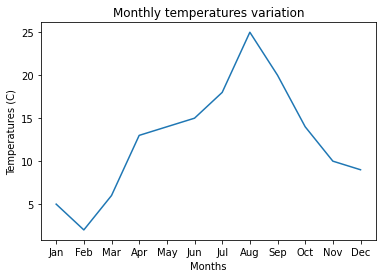

In [42]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
          "Sep", "Oct", "Nov", "Dec"]
temp_C = [5,2,6,13,14,15,18,25,20,14,10,9]
plt.plot(months, temp_C)
plt.title('Monthly temperatures variation')
plt.xlabel('Months')
plt.ylabel('Temperatures (C)')
plt.show()

Sometimes, the variation in values can vary a lot and have different scale. So we simulate two countries with varying GDP and demonstrate this graph is not clear to read.

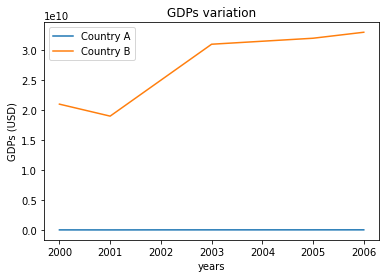

In [43]:
years = [2000, 2001, 2002, 2003, 2005, 2006]
GDPs_A = [1.3e7, 0.9e7, 1.6e7,1.8e7,1.9e7,2.1e7]
GDPs_B = [2.1e10, 1.9e10, 2.5e10,3.1e10,3.2e10,3.3e10]
plt.plot(years, GDPs_A, label="Country A")
plt.plot(years,GDPs_B,label="Country B")
plt.title('GDPs variation')
plt.xlabel('years')
plt.ylabel('GDPs (USD)')
plt.legend()
plt.show()

We use again the log 10 to show a comparison in one graph. It is worth noting in this case, the increase and decrease is not accentuated as much. The exponential aspect of the data has been removed. So, an interpretation needs to take into account this factor. However, we can show a lot more cleary both variations in both data.

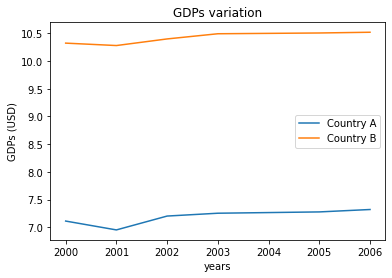

In [44]:
years = [2000, 2001, 2002, 2003, 2005, 2006]
GDPs_A = [1.3e7, 0.9e7, 1.6e7,1.8e7,1.9e7,2.1e7]
GDPs_B = [2.1e10, 1.9e10, 2.5e10,3.1e10,3.2e10,3.3e10]
plt.plot(years, np.log10(GDPs_A), label="Country A")
plt.plot(years,np.log10(GDPs_B), label="Country B")
plt.title('GDPs variation')
plt.xlabel('years')
plt.ylabel('GDPs (USD)')
plt.legend()
plt.show()

## Relationship

Some analysis can help us discovering some potential relationship between observations or data. We aim to explore and potentially discover how data may be related to each other.  For example, the land area of a country and its GDP.  These two observations or data appear to be independent from each other.  They appear to have been observed separately.

We need to check our chosen data are independent, that is one cannot be obtained from the other. One example would be exploring the relationship between individuals’ weight and their BMI; the latter is computed using this formulae BMI = weight/height2. So, the weight and BMI are considered as dependent variables.  We know an association using a known mathematical expression.

However, for independent variables, we often hope to describe the association with some known expressions, such as a linear or an exponential expression, for example.  So, we use some regression techniques to aim to discover those. 


### Visualising relationship

Visualising relationship between two chosen observations or data can achieve with a scatter plot. The position of each point on the x-axis and the y-axis indicates the value of an individual point. A scatter plot let us observe whether some relationship may exist between data.

So we plot the fares and the number of siblings / spouse in a scatter plot. The scatter plot is quite challenging to read. The second scatter plot shows a bit more clearly the match in the data with more details. It is the best that can be achieved. We can perhaps infer passengers traveling in larger families may have pay more each ticket. 

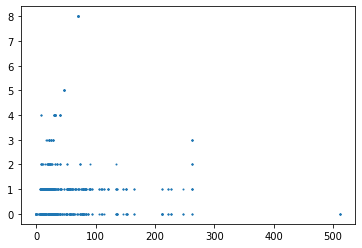

In [45]:
plt.scatter(data["'fare'"], data["'sibsp'"], s = 1)

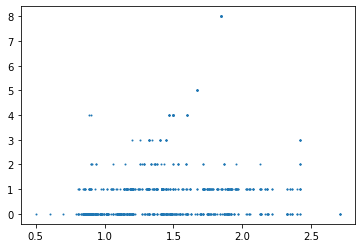

In [46]:
x = data.loc[data["'fare'"] > 0, ["'fare'"]]
y = data.loc[data["'fare'"] > 0, ["'sibsp'"]]
plt.scatter(np.log10(x), y, s=1)

We explore the relationship between age and fare. We may have some clusters of fare per age. Applying the log10 to both set of data shows more details in potential clusters.

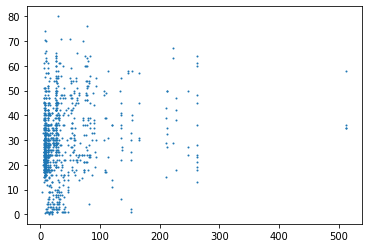

In [47]:
ages = data["'age'"]
ages = ages.replace ("?", 999)
ages = ages.astype(float)
data["'age'"] = ages
x = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'fare'"]]
y = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'age'"]]
plt.scatter(x, y, s = 1)

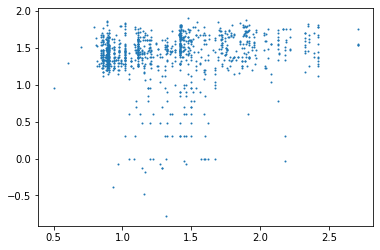

In [48]:
ages = data["'age'"]
ages = ages.replace ("?", 999)
ages = ages.astype(float)
data["'age'"] = ages
x = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'fare'"]]
y = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'age'"]]
plt.scatter(np.log10(x), np.log10(y), s = 1)

## Testing for linearity

Linearity is a relationship can be expressed as a straight line. A Pearson’s correlation coefficient measures the linear correlation between two data. Pearson’s correlation coefficient returns a numerical value that can confirms our observation made on a scatter plot.  It could support our decision of choosing appropriate analytical methodologies.

### Is there a correlation between fares and number of siblings/spouse traveling on the Titanic?

The above scatter plot suggested a correlation was highly unlikely. The three correlations shown below confirmed our assumption numerically.

In [49]:
x = list(data["'fare'"])
y = list(data["'sibsp'"])

print("Pearson  : " , scipy.stats.pearsonr(x, y)[0])   # Pearson's r

print("Spearman : " , scipy.stats.spearmanr(x, y)[0] )  # Spearman's rho

print("Kendall  : " , scipy.stats.kendalltau(x, y)[0]) # Kendall's tau


Pearson  :  0.16043996653488585
Spearman :  0.4458772417727718
Kendall  :  0.3570445658158402


### Is there a correlation between fares and the age of passengers travelling on the Titanic?

The above scatter plot suggested a correlation was highly unlikely. The three correlations shown below confirmed our assumption numerically.

In [50]:

x = data.loc[data["'age'"] < 999, "'fare'"]
x = list(x)

y = data.loc[(data["'age'"] < 999), "'age'"]
y = list(y)

print("Pearson  : " , scipy.stats.pearsonr(x, y)[0])   # Pearson's r

print("Spearman : " , scipy.stats.spearmanr(x, y)[0] )  # Spearman's rho

print("Kendall  : " , scipy.stats.kendalltau(x, y)[0]) # Kendall's tau


Pearson  :  0.1769386401456062
Spearman :  0.18947642093473568
Kendall  :  0.12961133210331646


### Is there a correlation between passenger class and fares?¶

In many public transport tickets to a higher class can cost more than a lower class. So, would like to explore whether this was the case with the titanic.

So we first convert in numerical data both the class and the fares.

It appears only one fare remains not captured and therefore unknown. The distribution of the fares appears to have mean value at around 33 (unknown currency) with a standard deviation of approximately 52 (unknown currency).  So we could surmise the fares may be skewed to the left. 

We surmise the larger proportion of third class tickets may skew the distribution.

In [51]:
data["'fare'"].dtype

dtype('float64')

In [52]:
fares = data["'fare'"]
fares = fares.replace("?", "-1")
fares = fares.astype(float)
data["'fare'"] = fares
fares

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: 'fare', Length: 1309, dtype: float64

count    1309.000000
mean       33.269280
std        51.747562
min        -1.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: 'fare', dtype: float64

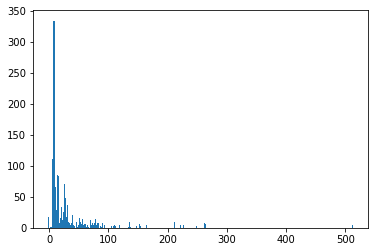

In [53]:
plt.hist(fares, bins = 300)
fares.describe()

In [54]:
fares[fares == -1].count()

1

In [55]:
data["'pclass'"].dtypes

dtype('int64')

In [56]:
pclasses = data["'pclass'"].astype(float)
pclasses

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1304    3.0
1305    3.0
1306    3.0
1307    3.0
1308    3.0
Name: 'pclass', Length: 1309, dtype: float64

The fares appears vary for each class. The first class spread of the data. However, there appear not to have a clear distinction within the data. None of the correlations suggest a strong correalation exists the values varies between [-0.56, and -0.71]. However, it suggests the fares are likely to decrease as the classes decreases. 


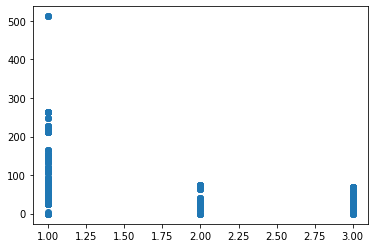

In [57]:
plt.scatter(pclasses, fares)

In [58]:
data_vis = pd.DataFrame({"Pclass": pclasses, "Fares": fares})
data_vis.dtypes

Pclass    float64
Fares     float64
dtype: object

Fares                                         
         min       mean        std   median       max
Pclass                                               
1.0      0.0  87.508992  80.447178  60.0000  512.3292
2.0      0.0  21.179196  13.607122  15.0458   73.5000
3.0     -1.0  13.282715  11.498791   8.0500   69.5500

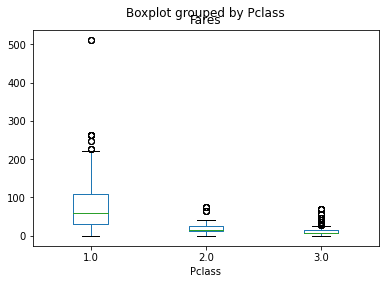

In [59]:
data_vis.boxplot("Fares", by="Pclass", grid=False)
data_vis.groupby(["Pclass"]).aggregate(["min","mean","std","median", "max"])

In [60]:
print("Pearson  : " , scipy.stats.pearsonr(pclasses, fares)[0])   # Pearson's r

print("Spearman : " , scipy.stats.spearmanr(pclasses, fares)[0] )  # Spearman's rho

print("Kendall  : " , scipy.stats.kendalltau(pclasses, fares)[0]) # Kendall's tau


Pearson  :  -0.5588100663539586
Spearman :  -0.7091345258216657
Kendall  :  -0.5916856604501165


## Analysing  the strength of a relationship

We sometimes need to measure the strength of a relationship between data. Otherwise, we cannot establish and demonstrate the relationship.

### Model fitting and prediction with regression analysis

Regression analysis can help us establish whether some specific patterns may exist in the data. We aim to find some values that can help us writing a mathematical expression.  Those values are referred as predictors.  A two-process compute first some predictors; it is the referred as model fitting.  The second phase create some predicted data using those predictors.   The latter can then be used to generate new values, that can be compared against the known data. The outcome of this comparison then suggests a strong or weak against a specific pattern in the data.

We may need to explore the strength of a straight line, a U or N shape (quadratic expression), exponential growth (i.e. sharp increase).  Sometimes we need to try several regression techniques before selecting the most suitable set of predictors. 

Some regression may require splitting the data into some learning and testing dataset. The model fitting uses a learning dataset and prediction phase the testing dataset. You will experience those in your practical task.


#### Linear regression
A linear regression attempts to describe the strength as a relationship as a straight line; that is 𝑦 = 𝑎𝑥+𝑐. This equation has been adapted to a new equation: $y ̂=β_{x} x+ β_{0}+e$  . The constant c is now obtained by adding error e and the constant value $β_{0}$. 

Let's have simulate a terrible example. Please, ignore the math, but look at the shape. We have a Pearson and other correlations suggesting it may be increasing linearly. However, the graphical representation suggest otherwise. 



##### Misleading correlations 

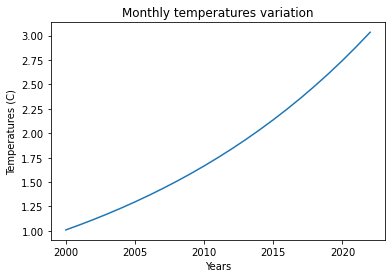

In [61]:
years = range(2000,2023)
temp_C = [5e-2 * x + 0.01 for x in range(0,23)]
temp_C = np.exp(temp_C)

plt.plot(years, temp_C)
plt.title('Monthly temperatures variation')
plt.xlabel('Years')
plt.ylabel('Temperatures (C)')
plt.show()

In [62]:
print("Pearson  : " , scipy.stats.pearsonr(years, temp_C)[0])   # Pearson's r

print("Spearman : " , scipy.stats.spearmanr(years, temp_C)[0] )  # Spearman's rho

print("Kendall  : " , scipy.stats.kendalltau(years, temp_C)[0]) # Kendall's tau


Pearson  :  0.9893400063012718
Spearman :  1.0
Kendall  :  1.0


We test for a linear relationship. The model has a low standard error. However, a visualisation suggest the relationship may is not linear.  The next step is likely to test if there is a sigmoid relationship between both statistical variables.

In [63]:
slope, intercept, r,p, std_err = stats.linregress(range(0,23), temp_C)
print("slope     : ", slope)
print("intercept : ", intercept)
print("r - Pearson correlation : ", r) 
print("standard err : ", std_err)


slope     :  0.09044893291948816
intercept :  0.8536183941457415
r - Pearson correlation :  0.989340006301272
standard err :  0.0029052346237728446


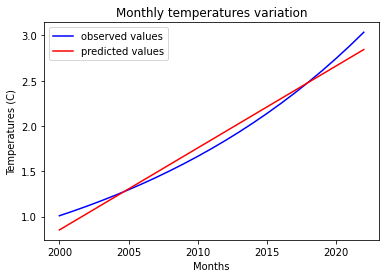

In [64]:
x = range(0,len(years))

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.plot(years, temp_C, color = "blue", label="observed values")
plt.plot(years, mymodel, color = "red", label="predicted values")
plt.title('Monthly temperatures variation')
plt.xlabel('Months')
plt.ylabel('Temperatures (C)')
plt.legend()
plt.show()

##### Finding about a linear relationship between fares and siblings/spouse

The above correlations obtained above suggested no linear relationship existed between these two statistical variables. This analysis confirmed the finding.  In fact, drawing a regression line with two statistical variables is inappropriate.

In [65]:
x = list(data["'fare'"])
y = list(data["'sibsp'"])
slope, intercept, r,p, std_err = stats.linregress(x, y)
print("slope     : ", slope)
print("intercept : ", intercept)
print("r - Pearson correlation : ", r) 
print("standard err : ", std_err)


slope     :  0.0032295944388510164
intercept :  0.3914078069464819
r - Pearson correlation :  0.16043996653488599
standard err :  0.000549584972426517


1309
1309
1309


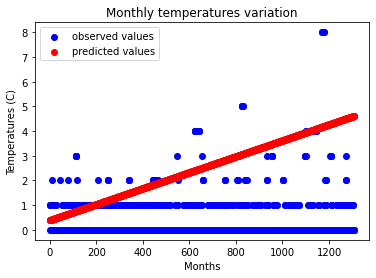

In [66]:
x = range(0, len(y))

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

print(len(x))
print(len(y))
print(len(mymodel))
plt.scatter(x, y, color = "blue", label="observed values")
plt.scatter(x, mymodel, color = "red", label="predicted values")
plt.title('Monthly temperatures variation')
plt.xlabel('Months')
plt.ylabel('Temperatures (C)')
plt.legend()
plt.show()

### Clusterisation

Previously we have shown that some clusters may be present in a relationship between the ticket fare and the age of the passengers. As, more than 200 ages are unknown for third class passengers, the analysis results needs to carefully considered and perhaps treated as invalid. 

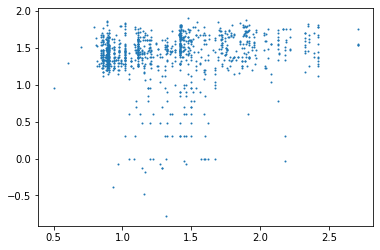

In [67]:
ages = data["'age'"]
ages = ages.replace ("?", 999)
ages = ages.astype(float)
data["'age'"] = ages
x = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'fare'"]]
y = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'age'"]]
plt.scatter(np.log10(x), np.log10(y), s = 1)

We apply Kmeans an unsupervised learning algorithm to explore whether some clusterisation exists between the fare and the age of some titanic passengers. We apply the log 10 view better the clusters. 

We surmise between 25 and 29 cluster shows some suitable clusteration between fare and age.  Across the age some passengers would have paid some low and high fare; the passenger class would have influence the price. However, the older passenger the higher clusterisation appears on our visual representation.

In [68]:

points = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'fare'", "'age'"]]
print(points)



        'fare'    'age'
0     211.3375  29.0000
1     151.5500   0.9167
2     151.5500   2.0000
3     151.5500  30.0000
4     151.5500  25.0000
...        ...      ...
1301    7.2250  45.5000
1304   14.4542  14.5000
1306    7.2250  26.5000
1307    7.2250  27.0000
1308    7.8750  29.0000

[1037 rows x 2 columns]


[[ 10.75286155  25.38760504]
 [238.60859375  37.046875  ]
 [ 68.43788652  36.93262411]
 [512.3292      41.        ]
 [ 27.20516934  10.47992701]
 [133.55552093  33.88178372]
 [ 21.63756078  45.91176471]]


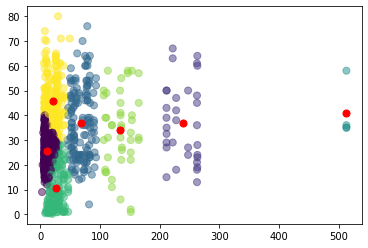

In [69]:
# Create a KMeans instance with 3 clusters: model
kmeans = KMeans(n_clusters=7).fit(points)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(points["'fare'"], points["'age'"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [70]:
# Import KMeans


points = data.loc[(data["'age'"] < 999) & (data["'fare'"] > 0), ["'fare'", "'age'"]]
points["'age'"] = np.log10(points["'age'"])
points["'fare'"] = np.log10(points["'fare'"])

print(points)



        'fare'     'age'
0     2.324977  1.462398
1     2.180556 -0.037773
2     2.180556  0.301030
3     2.180556  1.477121
4     2.180556  1.397940
...        ...       ...
1301  0.858838  1.658011
1304  1.159994  1.161368
1306  0.858838  1.423246
1307  0.858838  1.431364
1308  0.896251  1.462398

[1037 rows x 2 columns]


----- cluster  5  ----
[[0.97209054 1.430804  ]
 [2.05659298 1.53497137]
 [1.3682321  0.10860429]
 [1.44247983 0.91894097]
 [1.49045016 1.54880327]]


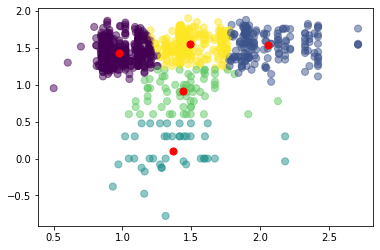

----- cluster  6  ----
[[1.42787795 0.90628152]
 [0.95544882 1.41886317]
 [1.3682321  0.10860429]
 [1.3838504  1.55436296]
 [1.83302542 1.53135721]
 [2.29848765 1.5354806 ]]


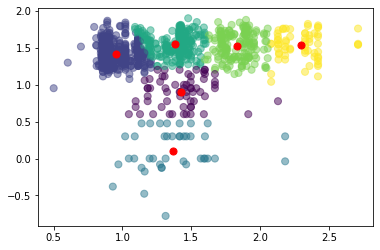

----- cluster  7  ----
[[2.30556205 1.54972964]
 [0.94151488 1.331857  ]
 [1.42151973 0.82778043]
 [1.84299534 1.52755759]
 [1.43178973 1.53720992]
 [1.37146037 0.03273315]
 [1.01603146 1.56689721]]


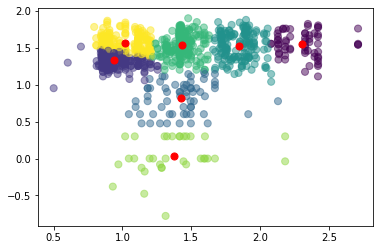

----- cluster  8  ----
[[0.93974973 1.33310048]
 [1.83631363 1.65225111]
 [1.38064182 0.79817257]
 [1.42210148 1.54661206]
 [2.30157113 1.54880316]
 [1.37146037 0.03273315]
 [1.7919822  1.29713274]
 [1.01743254 1.56644855]]


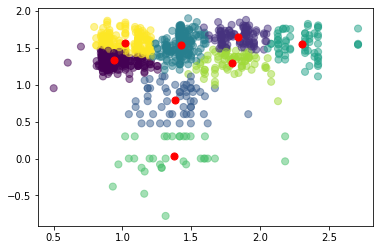

----- cluster  9  ----
[[1.43715471 1.57969041]
 [1.37146037 0.03273315]
 [1.18085059 1.37075029]
 [1.78052608 1.3009551 ]
 [1.38949171 0.76894029]
 [2.30157113 1.54880316]
 [0.90538927 1.34068089]
 [0.98114867 1.60205795]
 [1.84605288 1.65443232]]


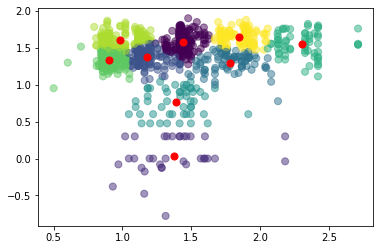

----- cluster  10  ----
[[0.92698571 1.31567607]
 [1.84605288 1.65443232]
 [1.37146037 0.03273315]
 [1.12802177 1.51847748]
 [2.30157113 1.54880316]
 [1.38949171 0.76894029]
 [1.45693997 1.6525995 ]
 [1.38628597 1.39107186]
 [1.80703707 1.30644108]
 [0.90167746 1.56722066]]


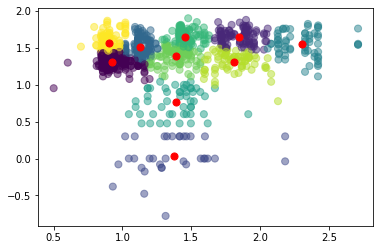

----- cluster  11  ----
[[ 1.1326325   1.46045817]
 [ 1.84742571  1.32602249]
 [ 1.40562415  0.9261374 ]
 [ 1.41529031  1.4095289 ]
 [ 0.91987042  1.58952554]
 [ 1.39976299  0.44733823]
 [ 0.90892288  1.32659942]
 [ 1.34160064 -0.11361058]
 [ 1.83885332  1.65664513]
 [ 1.45428576  1.66417078]
 [ 2.30157113  1.54880316]]


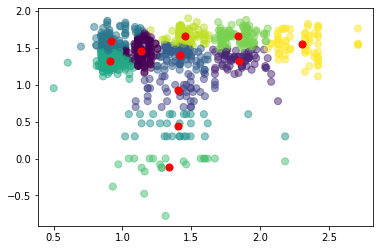

----- cluster  12  ----
[[ 1.41565275  1.43286932]
 [ 1.39976299  0.44733823]
 [ 1.84321073  1.65103501]
 [ 0.89942994  1.33270412]
 [ 1.12812066  1.54076113]
 [ 2.30157113  1.54880316]
 [ 1.41500314  0.90875237]
 [ 0.90143654  1.5789671 ]
 [ 1.46043168  1.67152489]
 [ 1.82314245  1.31094   ]
 [ 1.34160064 -0.11361058]
 [ 1.12823673  1.28877212]]


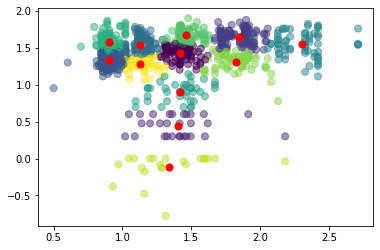

----- cluster  13  ----
[[ 0.89995779  1.31965587]
 [ 1.83885332  1.65664513]
 [ 1.20541499 -0.15385375]
 [ 1.40936769  1.4311165 ]
 [ 1.43277293  0.97638729]
 [ 2.30157113  1.54880316]
 [ 1.45994808  1.67029912]
 [ 0.89857295  1.55200963]
 [ 1.65164913  0.2099079 ]
 [ 1.12566779  1.62806088]
 [ 1.83670143  1.3226783 ]
 [ 1.30161443  0.54953963]
 [ 1.11743005  1.37715898]]


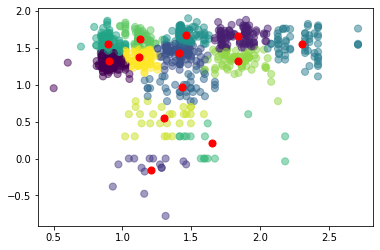

----- cluster  14  ----
[[1.84541569 1.67123292]
 [0.89899388 1.52161784]
 [1.34010668 0.62922567]
 [1.40636687 1.44379361]
 [2.31192636 1.65632239]
 [1.32089189 0.02655219]
 [1.10462903 1.65450153]
 [1.44289907 1.0183598 ]
 [0.9002739  1.3050732 ]
 [1.80271938 1.36421698]
 [1.46166941 1.6770069 ]
 [2.23450756 1.35552777]
 [1.12015904 1.38563178]
 [2.10072422 0.41086712]]


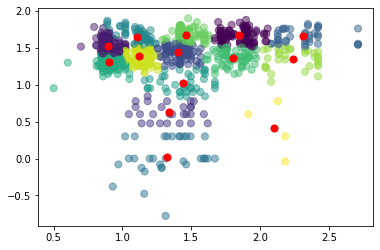

----- cluster  15  ----
[[ 1.1159541   1.32186485]
 [ 2.42099992  1.62882855]
 [ 1.65164913  0.2099079 ]
 [ 0.89485682  1.33085048]
 [ 1.80216566  1.36581069]
 [ 1.82258602  1.67986152]
 [ 1.41024125  1.44469155]
 [ 0.90143654  1.5789671 ]
 [ 1.20541499 -0.15385375]
 [ 1.46904805  1.00190933]
 [ 1.12886041  1.5584954 ]
 [ 1.29829336  0.56761446]
 [ 1.4636198   1.67773671]
 [ 2.2535288   1.24840496]
 [ 2.09691842  1.5854795 ]]


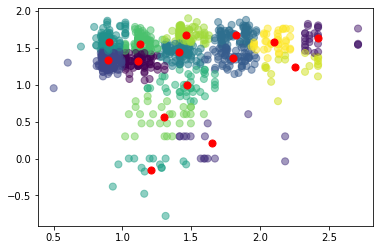

----- cluster  16  ----
[[ 1.39845798  1.46959529]
 [ 1.85070527  1.35138302]
 [ 0.90208057  1.28476124]
 [ 1.3314826   0.47023674]
 [ 2.25954816  1.6666925 ]
 [ 1.4019703   0.90344303]
 [ 0.90793647  1.66822688]
 [ 1.17006992 -0.16747776]
 [ 1.12765492  1.36932979]
 [ 2.35760176  1.40169391]
 [ 1.84154463  1.66835158]
 [ 1.6913445   0.04473158]
 [ 1.46602267  1.67976564]
 [ 1.1386463   1.60378565]
 [ 0.90370939  1.45474121]
 [ 1.53315835  1.23758797]]


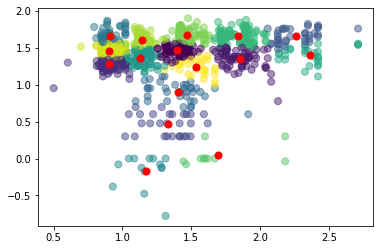

----- cluster  17  ----
[[ 0.89681314  1.46722525]
 [ 1.46543589  1.67848329]
 [ 1.83696695  1.34453269]
 [ 1.32676677  0.61731162]
 [ 1.4316264   0.16812414]
 [ 1.41398698  1.44328569]
 [ 2.41208412  1.40509662]
 [ 1.83322478  1.66230417]
 [ 1.17426305  1.19644959]
 [ 1.10530539  1.4214022 ]
 [ 0.90059907  1.29743171]
 [ 1.14683111  1.61076894]
 [ 1.51075297  0.99825627]
 [ 2.22049866  1.63393478]
 [ 1.15904916 -0.18036066]
 [ 2.10072422  0.41086712]
 [ 0.90844706  1.67193152]]


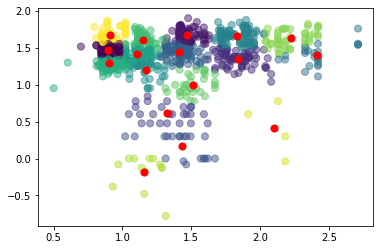

----- cluster  18  ----
[[ 2.26005056  1.6477488 ]
 [ 1.12055483  1.38556449]
 [ 1.34020268  0.46176514]
 [ 1.39927163  1.44808301]
 [ 1.97442036  1.31900702]
 [ 0.88917651  1.63140575]
 [ 0.9033812   1.43948757]
 [ 1.9266714   1.66301411]
 [ 1.12342511  1.62845806]
 [ 1.70565819  1.3371146 ]
 [ 1.6913445   0.04473158]
 [ 1.5133154   0.90611787]
 [ 1.44601119  1.68178172]
 [ 1.20650656  1.00286682]
 [ 2.45574453  1.40645018]
 [ 1.71209536  1.65364543]
 [ 0.90105176  1.28064383]
 [ 1.17006992 -0.16747776]]


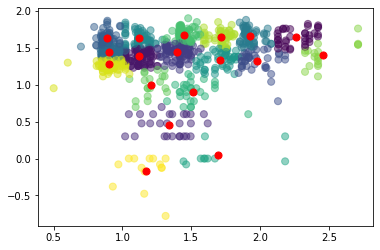

----- cluster  19  ----
[[ 0.90291561  1.45489916]
 [ 1.84098083  1.69611539]
 [ 1.48615202  0.42064316]
 [ 1.39683691  1.4786554 ]
 [ 1.86086875  1.33435117]
 [ 1.17006992 -0.16747776]
 [ 2.29363283  1.25022025]
 [ 1.50939982  1.24892965]
 [ 1.69437075  1.52803152]
 [ 2.09807475  1.59152685]
 [ 0.90208057  1.28476124]
 [ 1.12481061  1.3710907 ]
 [ 1.13611639  1.60364932]
 [ 1.45560453  1.68988935]
 [ 1.41005201  0.92197227]
 [ 2.42099992  1.62882855]
 [ 1.18718905  0.56500583]
 [ 1.70164347  0.01625398]
 [ 0.90793647  1.66822688]]


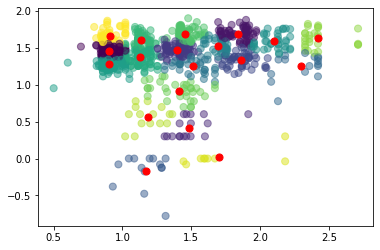

----- cluster  20  ----
[[ 1.85532512  1.7003296 ]
 [ 0.90086701  1.28735764]
 [ 1.17006992 -0.16747776]
 [ 1.3943879   1.4784627 ]
 [ 1.54366826  0.91498718]
 [ 2.34560088  1.3529474 ]
 [ 0.90793647  1.66822688]
 [ 1.35565256  0.36950993]
 [ 1.1053155   1.42355581]
 [ 1.86381455  1.32443611]
 [ 0.89616821  1.45407095]
 [ 1.17426305  1.19644959]
 [ 2.09807475  1.59152685]
 [ 2.43505822  1.66830196]
 [ 1.70164347  0.01625398]
 [ 1.139604    1.61667271]
 [ 1.70494728  1.56158741]
 [ 1.31710911  0.68400167]
 [ 1.45560453  1.68988935]
 [ 1.51757806  1.27123505]]


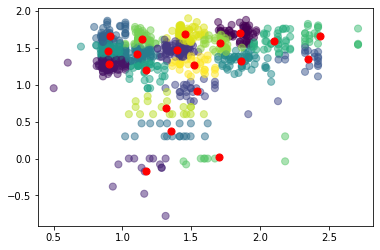

----- cluster  21  ----
[[ 1.82258602  1.67986152]
 [ 0.89404151  1.28859351]
 [ 1.17762089  0.77053328]
 [ 1.46700038  1.68080918]
 [ 1.17006992 -0.16747776]
 [ 2.43505822  1.66830196]
 [ 0.89597995  1.45106414]
 [ 1.11082273  1.29274219]
 [ 1.39732095  1.47707062]
 [ 1.80807957  1.37568696]
 [ 1.11853365  1.47682984]
 [ 1.48123221  0.90580295]
 [ 2.09139153  0.28843907]
 [ 2.06086348  1.20102628]
 [ 1.37927175  0.42764745]
 [ 1.49271087  1.24714577]
 [ 2.10024531  1.58643246]
 [ 0.88898972  1.64257327]
 [ 1.11411931  1.67683477]
 [ 2.3818225   1.35135118]
 [ 1.56481133 -0.0167102 ]]


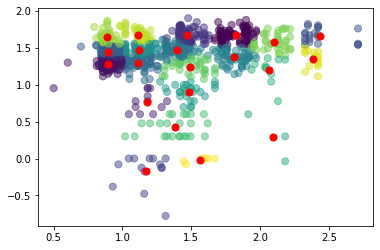

----- cluster  22  ----
[[ 0.89837018  1.29986048]
 [ 1.7058403   1.65881975]
 [ 1.17781456  0.58953762]
 [ 1.39768082  1.47402   ]
 [ 1.80733166  1.372591  ]
 [ 2.13986651  1.60852773]
 [ 1.5333774  -0.01462142]
 [ 0.90844706  1.67193152]
 [ 1.44569902  1.68492723]
 [ 1.4514876   0.41329382]
 [ 1.11003614  1.44333643]
 [ 1.44789468  0.90637285]
 [ 1.13949048  1.24012714]
 [ 2.3818225   1.35135118]
 [ 1.15904916 -0.18036066]
 [ 2.10072422  0.41086712]
 [ 0.8958101   1.46670708]
 [ 1.91053174  1.67741573]
 [ 1.52047663  1.26127384]
 [ 2.43505822  1.66830196]
 [ 2.05420342  1.31713678]
 [ 1.1447665   1.63419834]]


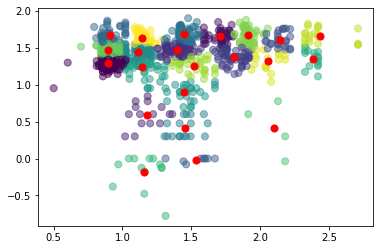

----- cluster  23  ----
[[ 0.91519025  1.44129714]
 [ 1.91536409  1.67760229]
 [ 1.37006336  0.42006429]
 [ 1.40643162  1.45882194]
 [ 1.4436774   1.68399031]
 [ 1.51665218  0.86882727]
 [ 1.14537962  1.44769959]
 [ 1.97735366  1.20790334]
 [ 0.90206454  1.28853374]
 [ 2.14040844  1.58015698]
 [ 1.81104702  1.40788395]
 [ 0.88305117  1.62427974]
 [ 1.13399123 -0.5451352 ]
 [ 2.36924334  1.35079315]
 [ 2.43505822  1.66830196]
 [ 1.70779183  1.66243591]
 [ 2.18055594  0.13162861]
 [ 1.11005838  1.65875158]
 [ 1.19767868  0.7931237 ]
 [ 1.56481133 -0.0167102 ]
 [ 1.60160402  1.22952547]
 [ 1.17990956 -0.06448027]
 [ 1.16371093  1.22968532]]


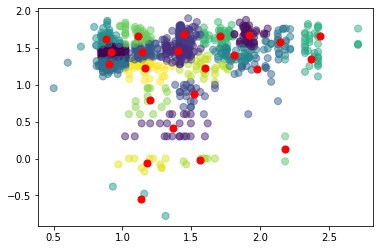

----- cluster  24  ----
[[ 0.90147689  1.50927251]
 [ 1.91435825  1.52948602]
 [ 1.56481133 -0.0167102 ]
 [ 1.44533825  1.68648357]
 [ 1.17290219  1.21846842]
 [ 1.52259528  0.8754644 ]
 [ 0.90295894  1.24915262]
 [ 2.35814408  1.3535665 ]
 [ 1.40312544  1.47574255]
 [ 1.14175176  1.6230182 ]
 [ 1.75501334  1.3930785 ]
 [ 1.37006336  0.42006429]
 [ 1.17006992 -0.16747776]
 [ 1.12059535  1.42939702]
 [ 2.43505822  1.66830196]
 [ 1.7033831   1.6584991 ]
 [ 1.9072837   1.73193673]
 [ 1.19767868  0.7931237 ]
 [ 0.90221891  1.36861687]
 [ 1.95022083  1.26241716]
 [ 0.913518    1.69653352]
 [ 2.13958159  1.59479742]
 [ 1.51730245  1.25686525]
 [ 2.18055594  0.13162861]]


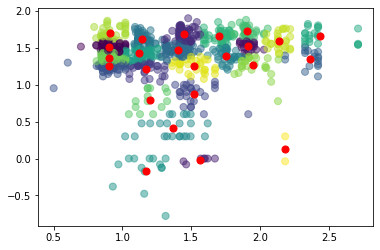

----- cluster  25  ----
[[ 1.39811147  1.48882574]
 [ 0.88376195  1.62137972]
 [ 1.15910638 -0.09078829]
 [ 2.3818225   1.35135118]
 [ 1.34020268  0.46176514]
 [ 1.82565623  1.46521385]
 [ 0.88996949  1.28247814]
 [ 1.0940037   1.30235811]
 [ 1.11411931  1.67683477]
 [ 1.91840399  1.71353963]
 [ 1.21035666  0.9429326 ]
 [ 1.56904163  0.02300733]
 [ 1.4505195   1.6913631 ]
 [ 2.05003687  0.89193299]
 [ 1.50697659  0.90548543]
 [ 1.8383714   1.27507552]
 [ 0.9008796   1.43622693]
 [ 1.70973682  1.65964371]
 [ 2.32097649  1.69820241]
 [ 1.4748616   1.29084954]
 [ 2.70954911  1.60196665]
 [ 2.18055594  0.13162861]
 [ 1.23585117 -0.62761454]
 [ 1.12578172  1.47484367]
 [ 2.12856239  1.51435151]]


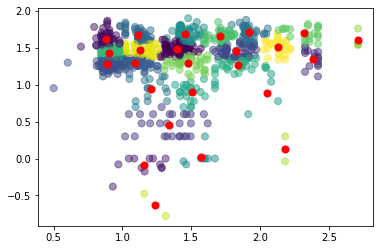

----- cluster  26  ----
[[ 1.75171795  1.40561388]
 [ 0.91294698  1.23507827]
 [ 1.37742755 -0.0297365 ]
 [ 1.4505195   1.6913631 ]
 [ 0.91190886  1.69223927]
 [ 2.4364436   1.38415035]
 [ 1.43685824  0.35521192]
 [ 0.8994729   1.35593643]
 [ 1.4544567   1.34754606]
 [ 1.9072837   1.73193673]
 [ 1.14994063  1.64532631]
 [ 1.64289541  1.14922964]
 [ 1.34879431  0.96763294]
 [ 2.38024781  1.69188302]
 [ 1.11220748 -0.33593541]
 [ 1.45923267  0.71653399]
 [ 0.8969837   1.4973079 ]
 [ 1.70605735  1.65565024]
 [ 1.15674729  1.3056172 ]
 [ 1.13116562  0.5316725 ]
 [ 2.10072422  0.41086712]
 [ 1.39162127  1.49990428]
 [ 1.10571128  1.47083892]
 [ 1.91435825  1.52948602]
 [ 1.95749549  1.28859257]
 [ 2.13822689  1.58154057]]


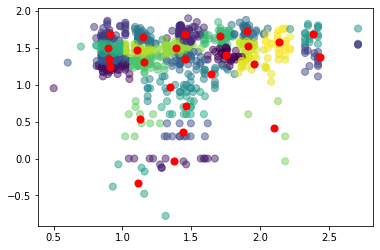

----- cluster  27  ----
[[ 2.70954911  1.60196665]
 [ 1.13193865  1.46877583]
 [ 1.74032868  1.39395558]
 [ 1.4514876   0.41329382]
 [ 1.39956624  1.4900887 ]
 [ 0.8881674   1.26558213]
 [ 1.90942493  1.48927173]
 [ 1.48693689  0.90259355]
 [ 1.91717228  1.73347296]
 [ 0.90242297  1.51480622]
 [ 2.12867045  1.50665908]
 [ 2.31285118  1.69823439]
 [ 1.20357155  1.15381139]
 [ 2.10072422  0.41086712]
 [ 1.56481133 -0.0167102 ]
 [ 1.4505195   1.6913631 ]
 [ 1.12003571  1.67142426]
 [ 1.71091444  1.65701699]
 [ 1.13399123 -0.5451352 ]
 [ 1.06562032  1.31798214]
 [ 2.3818225   1.35135118]
 [ 0.89435638  1.38820112]
 [ 1.47636612  1.28974781]
 [ 1.17781456  0.58953762]
 [ 0.88886349  1.68259781]
 [ 1.17990956 -0.06448027]
 [ 1.89571407  1.22929399]]


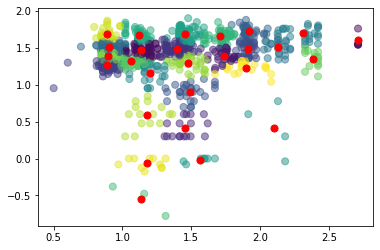

----- cluster  28  ----
[[ 0.89010097  1.36263576]
 [ 1.87557157  1.74173119]
 [ 1.15910638 -0.09078829]
 [ 1.80938941  1.37014599]
 [ 1.4505195   1.6913631 ]
 [ 0.88863261  1.66340823]
 [ 1.60067732  1.12610378]
 [ 2.43505822  1.66830196]
 [ 1.10907708  1.42989169]
 [ 2.3818225   1.35135118]
 [ 1.12543181  1.64828638]
 [ 1.46091739  0.58598115]
 [ 1.56481133 -0.0167102 ]
 [ 1.38516179  1.49839192]
 [ 1.70296748  1.62487235]
 [ 1.92413028  1.5555631 ]
 [ 1.42497593  0.30103   ]
 [ 0.91098249  1.24839489]
 [ 0.90358653  1.49280778]
 [ 1.23585117 -0.62761454]
 [ 2.09139153  0.28843907]
 [ 1.46580626  1.35239443]
 [ 1.4548838   0.90297502]
 [ 1.96126431  1.17631988]
 [ 1.17426305  1.19644959]
 [ 2.12904391  1.6956735 ]
 [ 2.13522376  1.4726429 ]
 [ 1.15096728  0.5876111 ]]


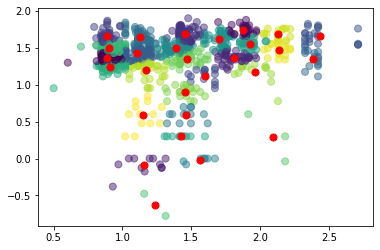

----- cluster  29  ----
[[ 1.40684242  1.36015723]
 [ 0.8994389   1.44185088]
 [ 1.18886295  0.78072995]
 [ 1.92852558  1.54822597]
 [ 1.33038208  0.35605851]
 [ 0.90004288  1.28711887]
 [ 1.14249351  1.56989695]
 [ 1.77204758  1.41613663]
 [ 2.70954911  1.60196665]
 [ 1.50149849  0.95691405]
 [ 1.91601384  1.73628609]
 [ 1.17990956 -0.06448027]
 [ 1.39271997  1.50447813]
 [ 1.1015649   1.41348199]
 [ 1.44524155  1.74977098]
 [ 2.15477759  1.50717728]
 [ 1.56481133 -0.0167102 ]
 [ 0.88346657  1.61045849]
 [ 1.17290219  1.21846842]
 [ 2.31285118  1.69823439]
 [ 1.51285422  0.63013393]
 [ 1.13399123 -0.5451352 ]
 [ 2.38585908  1.3398846 ]
 [ 1.05394644  1.75685246]
 [ 1.94499483  1.25450518]
 [ 1.7329023   1.66271322]
 [ 2.18055594  0.13162861]
 [ 1.48347351  1.62172934]
 [ 1.62585305  1.25025199]]


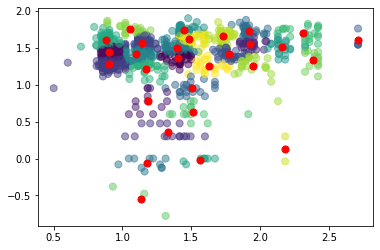

----- cluster  30  ----
[[ 0.89538145  1.3488648 ]
 [ 1.70107058  1.66708143]
 [ 1.50632883  0.61993308]
 [ 1.12003571  1.67142426]
 [ 1.92257561  1.53741748]
 [ 1.15910638 -0.09078829]
 [ 1.27230146  1.48341384]
 [ 1.43373264  1.47432363]
 [ 2.14373821  1.12148462]
 [ 2.44054562  1.67451365]
 [ 0.88988358  1.65769911]
 [ 1.51119635  0.94919616]
 [ 1.20563126  0.9353896 ]
 [ 1.44722634  1.68747951]
 [ 2.18055594  0.13162861]
 [ 1.72950977  1.45359879]
 [ 1.85874417  1.31422529]
 [ 1.57234695  1.24309768]
 [ 0.88388193  1.23279361]
 [ 1.8928394   1.73662523]
 [ 1.09909597  1.46665804]
 [ 1.42497593  0.30103   ]
 [ 1.56481133 -0.0167102 ]
 [ 1.23585117 -0.62761454]
 [ 1.08619845  1.29513416]
 [ 1.16581829  0.519515  ]
 [ 2.12233035  1.64249444]
 [ 0.89812173  1.47761266]
 [ 2.3040495   1.40450127]
 [ 1.34577327  1.256041  ]]


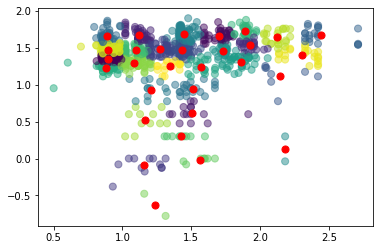

----- cluster  31  ----
[[ 0.8980475   1.47930592]
 [ 1.60067732  1.12610378]
 [ 1.92107623  1.73099045]
 [ 1.56481133 -0.0167102 ]
 [ 1.46003065  1.62817739]
 [ 1.09198681  1.42691972]
 [ 2.3818225   1.35135118]
 [ 1.44832457  0.59405178]
 [ 0.89537979  1.34741053]
 [ 1.11626371  1.65347794]
 [ 1.83297409  1.31528389]
 [ 2.09139153  0.28843907]
 [ 1.40489571  0.91234874]
 [ 1.70806091  1.48280328]
 [ 2.36195329  1.6879083 ]
 [ 1.16974698  1.22400204]
 [ 2.14181769  1.57736152]
 [ 1.26727333  1.48599754]
 [ 1.447884    1.75608664]
 [ 1.45488793  1.33677054]
 [ 0.88969806  1.6615903 ]
 [ 1.15910638 -0.09078829]
 [ 1.23585117 -0.62761454]
 [ 1.42497593  0.30103   ]
 [ 1.13589149  0.55407966]
 [ 1.42494403  1.49061468]
 [ 2.06086348  1.20102628]
 [ 1.72727059  1.6843859 ]
 [ 0.90445074  1.23478658]
 [ 2.70954911  1.60196665]
 [ 1.91252532  1.52154066]]


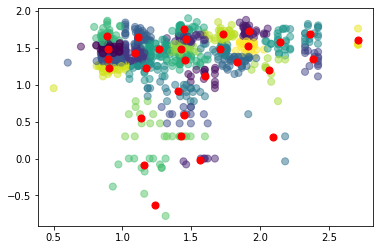

----- cluster  32  ----
[[ 0.91424176  1.46634039]
 [ 2.3818225   1.35135118]
 [ 1.44304993  0.6725149 ]
 [ 1.43386504  1.60679178]
 [ 1.90996721  1.6836847 ]
 [ 1.15910638 -0.09078829]
 [ 1.14921994  1.42996698]
 [ 1.80019993  1.40984455]
 [ 1.43310766  1.34262594]
 [ 0.88084961  1.61545418]
 [ 0.8888024   1.23159648]
 [ 1.49787164  0.93685274]
 [ 1.44628246  0.34505281]
 [ 1.04633651  1.76292035]
 [ 2.11626348  1.51312678]
 [ 1.56481133 -0.0167102 ]
 [ 2.18055594  0.13162861]
 [ 1.19578657  0.9484928 ]
 [ 1.04068032  1.30565763]
 [ 1.39774399  1.47934651]
 [ 2.32097649  1.69820241]
 [ 1.23585117 -0.62761454]
 [ 1.70605735  1.65565024]
 [ 1.94248508  1.23103085]
 [ 0.88896706  1.34897163]
 [ 1.45382447  1.74625663]
 [ 1.21919512  1.23168647]
 [ 2.70954911  1.60196665]
 [ 1.15393832  0.5015695 ]
 [ 2.0208925   0.69010562]
 [ 1.62029715  1.20878181]
 [ 1.13382651  1.58513774]]


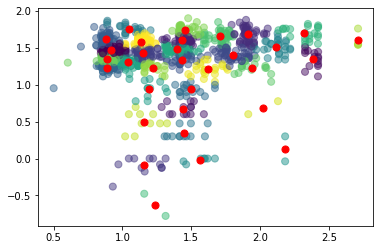

----- cluster  33  ----
[[ 0.88969806  1.6615903 ]
 [ 1.91916447  1.31401939]
 [ 1.44233843  1.59601081]
 [ 1.42497593  0.30103   ]
 [ 0.8942516   1.35499707]
 [ 1.35895926  1.25168098]
 [ 2.12904391  1.6956735 ]
 [ 1.13399123 -0.5451352 ]
 [ 1.48969621  0.91682378]
 [ 1.0989188   1.31775045]
 [ 1.70886205  1.65807335]
 [ 1.17990956 -0.06448027]
 [ 2.40052904  1.30929315]
 [ 1.44832457  0.59405178]
 [ 1.73447694  1.4173942 ]
 [ 1.12003571  1.67142426]
 [ 1.45382447  1.74625663]
 [ 2.70954911  1.60196665]
 [ 0.8978801   1.48820297]
 [ 1.2185312   0.92340697]
 [ 0.89799443  1.22763444]
 [ 2.21039899  1.47093709]
 [ 1.56481133 -0.0167102 ]
 [ 1.11249343  1.48065641]
 [ 1.64727632  1.18832596]
 [ 1.8928394   1.73662523]
 [ 2.18055594  0.13162861]
 [ 1.94433742  1.54671814]
 [ 2.04032208  0.80720131]
 [ 1.13506841  0.50428597]
 [ 2.37329474  1.69265041]
 [ 1.31437852  1.48835843]
 [ 1.4504254   1.43528306]]


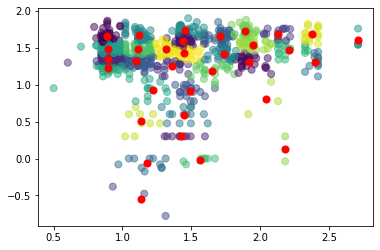

----- cluster  34  ----
[[ 1.15690427  1.29390383]
 [ 1.91668799  1.54423416]
 [ 1.17990956 -0.06448027]
 [ 1.41684703  1.57214188]
 [ 0.89770648  1.48315417]
 [ 1.51080174  0.93364662]
 [ 0.91171792  1.2390755 ]
 [ 2.36195329  1.6879083 ]
 [ 2.10177555  1.31531487]
 [ 1.76551188  1.24720834]
 [ 1.14017617  1.63224477]
 [ 1.58875555  1.65314529]
 [ 1.13506841  0.50428597]
 [ 2.18055594  0.13162861]
 [ 1.42497593  0.30103   ]
 [ 1.50779122  1.26247851]
 [ 2.3818225   1.35135118]
 [ 1.74700617  1.69082136]
 [ 0.96114454  1.78791464]
 [ 0.89920034  1.35626089]
 [ 1.13399123 -0.5451352 ]
 [ 1.43818583  1.7299543 ]
 [ 1.44002077  0.60632508]
 [ 1.56481133 -0.0167102 ]
 [ 2.13664708  1.60238827]
 [ 1.10933672  1.45889768]
 [ 1.39721692  1.43513348]
 [ 2.70954911  1.60196665]
 [ 1.72154313  1.47610713]
 [ 2.04032208  0.80720131]
 [ 1.21042132  0.97212859]
 [ 1.91708301  1.73230639]
 [ 0.88932509  1.62236648]
 [ 1.87981224  1.35661986]]


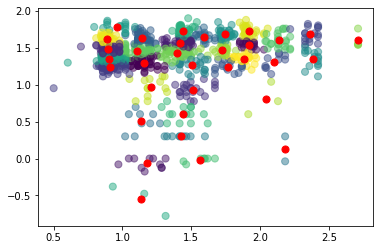

----- cluster  35  ----
[[ 2.12468724  1.71007558]
 [ 1.16577287  1.41033515]
 [ 1.47234654  0.59505281]
 [ 1.65376816  1.16100798]
 [ 1.47768101  1.61714718]
 [ 0.89829991  1.48890144]
 [ 0.8884574   1.36379222]
 [ 1.56481133 -0.0167102 ]
 [ 2.3818225   1.35135118]
 [ 1.4173776   0.92020053]
 [ 1.72522019  1.67436101]
 [ 1.06631173  1.74709432]
 [ 1.17598902  1.21845865]
 [ 1.74694986  1.42612721]
 [ 1.15910638 -0.09078829]
 [ 1.39032245  1.49526565]
 [ 2.37047213  1.68391027]
 [ 1.17090556  1.61566737]
 [ 2.18055594  0.13162861]
 [ 2.0208925   0.69010562]
 [ 1.34851163  0.32812096]
 [ 0.88541349  1.65548686]
 [ 1.90923618  1.53186623]
 [ 2.13221486  1.50152827]
 [ 1.4544567   1.34754606]
 [ 1.93792991  1.2879509 ]
 [ 2.70954911  1.60196665]
 [ 1.23585117 -0.62761454]
 [ 0.55229195  1.12763625]
 [ 1.15804743  0.6559763 ]
 [ 1.08731117  1.49562843]
 [ 1.01293025  1.32658872]
 [ 0.8954373   1.24869778]
 [ 1.44524155  1.74977098]
 [ 1.90046889  1.73692318]]


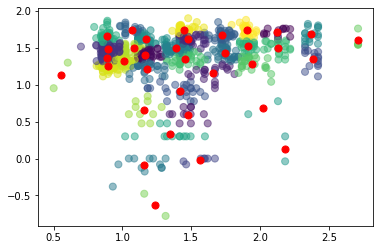

----- cluster  36  ----
[[ 1.72727059  1.6843859 ]
 [ 0.8923755   1.35614663]
 [ 1.34851163  0.32812096]
 [ 1.31503877  1.48006656]
 [ 2.3818225   1.35135118]
 [ 1.72185952  1.47346314]
 [ 0.88541349  1.65548686]
 [ 1.13708226  1.42627238]
 [ 1.47234654  0.59505281]
 [ 1.56481133 -0.0167102 ]
 [ 1.68482449  1.16923882]
 [ 1.45790351  1.61117224]
 [ 1.17990956 -0.06448027]
 [ 0.8876228   1.48958358]
 [ 2.13986651  1.60852773]
 [ 1.86373701  1.33838404]
 [ 1.22047865  1.23968028]
 [ 2.18055594  0.13162861]
 [ 1.4794439   1.28146701]
 [ 1.44627527  1.75192856]
 [ 1.03926754  1.28431952]
 [ 2.37047213  1.68391027]
 [ 1.07740051  1.74448213]
 [ 1.23431837  0.95245811]
 [ 1.13399123 -0.5451352 ]
 [ 1.14299933  1.57847783]
 [ 0.88065387  1.23290423]
 [ 1.43892374  1.45646394]
 [ 1.91708301  1.73230639]
 [ 1.15525823  0.63496278]
 [ 2.09972153  1.29041285]
 [ 0.99926235  1.46076166]
 [ 2.70954911  1.60196665]
 [ 1.91659416  1.53961149]
 [ 1.48969621  0.91682378]
 [ 2.0208925   0.69010562]]


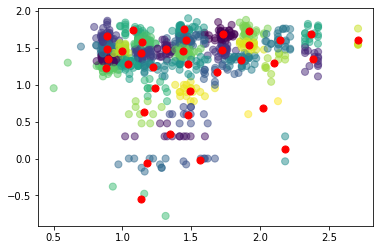

----- cluster  37  ----
[[ 1.49787164  0.93685274]
 [ 1.14770197  1.43443994]
 [ 1.72050705  1.47096542]
 [ 0.89110367  1.33058009]
 [ 1.17990956 -0.06448027]
 [ 2.35613241  1.50177837]
 [ 1.43909028  1.63167307]
 [ 0.89400494  1.55141182]
 [ 1.15393832  0.5015695 ]
 [ 1.41995784  1.33900323]
 [ 1.91312744  1.54753203]
 [ 1.07740051  1.74448213]
 [ 1.44628246  0.34505281]
 [ 1.85759503  1.33892851]
 [ 1.11609631  1.25947398]
 [ 1.62905243  1.20593391]
 [ 2.0540776   1.24331378]
 [ 1.44304993  0.6725149 ]
 [ 1.88007587  1.73330283]
 [ 2.39913911  1.28041143]
 [ 1.68923284  1.66518837]
 [ 0.89030165  1.22106345]
 [ 2.18055594  0.13162861]
 [ 0.88056921  1.69806597]
 [ 2.12435099  1.71818323]
 [ 1.56481133 -0.0167102 ]
 [ 0.89106649  1.43800229]
 [ 1.13399123 -0.5451352 ]
 [ 2.12961561  1.52300161]
 [ 2.3747529   1.71963506]
 [ 1.39747524  1.49096213]
 [ 1.13697314  1.58521814]
 [ 1.45359909  1.76653944]
 [ 2.70954911  1.60196665]
 [ 2.0208925   0.69010562]
 [ 1.22269742  0.96389377]
 [ 1

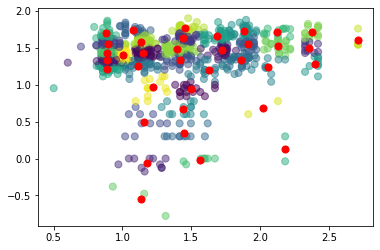

----- cluster  38  ----
[[ 2.12468724  1.71007558]
 [ 1.15797922  1.2566329 ]
 [ 1.20946803  0.38907563]
 [ 1.45382447  1.74625663]
 [ 0.91743515  1.43527189]
 [ 1.45202118  1.43501317]
 [ 1.26255752 -0.05484602]
 [ 1.92038603  1.30982851]
 [ 0.88284159  1.67817361]
 [ 1.45625259  0.67031031]
 [ 2.38585908  1.3398846 ]
 [ 1.140128    1.58782007]
 [ 1.38811737  1.27273786]
 [ 1.91184713  1.54225166]
 [ 1.56481133 -0.0167102 ]
 [ 2.13221486  1.50152827]
 [ 1.01275745  1.32302203]
 [ 1.70389125  1.66423348]
 [ 2.04032208  0.80720131]
 [ 1.32065768  1.48297376]
 [ 0.88733795  1.23117369]
 [ 1.7425622   1.43448983]
 [ 2.36796315  1.67435322]
 [ 1.22222564  1.00445815]
 [ 1.47260019  0.35385737]
 [ 0.89648649  1.53004758]
 [ 1.49781296  0.9461733 ]
 [ 1.23585117 -0.62761454]
 [ 0.88305672  1.34115537]
 [ 1.05565524 -0.12673057]
 [ 1.8928394   1.73662523]
 [ 1.13615833  1.43559926]
 [ 1.43968261  1.59671989]
 [ 2.70954911  1.60196665]
 [ 2.18055594  0.13162861]
 [ 1.64963824  1.21551177]
 [ 1

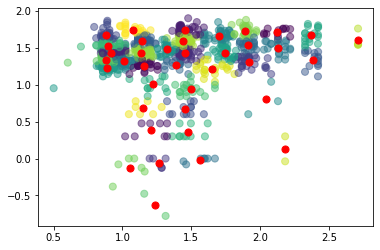

----- cluster  39  ----
[[ 0.99874889  1.40003021]
 [ 1.91141805  1.52604335]
 [ 1.42497593  0.30103   ]
 [ 1.40498394  1.3218609 ]
 [ 1.31030666  1.48903948]
 [ 2.3818225   1.35135118]
 [ 1.13674956  1.44529274]
 [ 1.19446118  0.7629153 ]
 [ 1.90046889  1.73692318]
 [ 0.98092163  1.78595098]
 [ 1.13399123 -0.5451352 ]
 [ 0.88792291  1.63096542]
 [ 1.72950977  1.45359879]
 [ 2.12435099  1.71818323]
 [ 1.58289139  1.65985583]
 [ 1.17990956 -0.06448027]
 [ 2.18055594  0.13162861]
 [ 1.84861925  1.30719604]
 [ 0.89060012  1.23200469]
 [ 0.89420809  1.49105299]
 [ 1.44442344  1.76939748]
 [ 1.16037141  0.47963611]
 [ 1.65114578  1.01870411]
 [ 1.44008927  1.48518882]
 [ 1.47234654  0.59505281]
 [ 1.11781379  1.26421853]
 [ 1.13322545  1.62916097]
 [ 2.09797061  1.30242055]
 [ 1.73934314  1.67477619]
 [ 1.58230355  1.23515762]
 [ 1.56481133 -0.0167102 ]
 [ 2.37047213  1.68391027]
 [ 1.47141172  0.91413154]
 [ 0.887518    1.3549538 ]
 [ 2.04032208  0.80720131]
 [ 2.12642978  1.53595104]
 [ 1

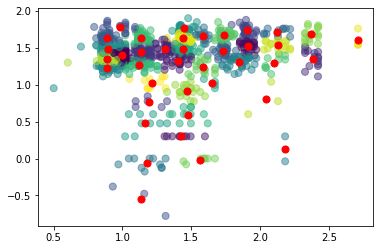

----- cluster  40  ----
[[ 1.31114184  1.23965247]
 [ 2.37389469  1.45173507]
 [ 1.00551397  1.47344801]
 [ 1.42497593  0.30103   ]
 [ 1.74044262  1.68188115]
 [ 1.43714758  1.57285425]
 [ 0.89006363  1.3560046 ]
 [ 1.72245417  1.465237  ]
 [ 1.49877004  0.92098259]
 [ 1.56481133 -0.0167102 ]
 [ 1.15910638 -0.09078829]
 [ 0.88790116  1.6286754 ]
 [ 1.22860946  0.59123969]
 [ 2.12961561  1.52300161]
 [ 1.12992035  1.65824397]
 [ 1.57845339  1.65756792]
 [ 1.03466486  1.29558161]
 [ 2.0208925   0.69010562]
 [ 1.23585117 -0.62761454]
 [ 1.83716709  1.31446151]
 [ 1.45553647  1.41581624]
 [ 2.37025289  1.70174027]
 [ 2.12435099  1.71818323]
 [ 0.88927347  1.48558484]
 [ 2.0540776   1.24331378]
 [ 2.39312147  1.23359209]
 [ 1.91141805  1.52604335]
 [ 0.88733795  1.23117369]
 [ 1.31808684  1.48976466]
 [ 1.0545495   0.30103   ]
 [ 1.43818583  1.7299543 ]
 [ 1.19578657  0.9484928 ]
 [ 1.13295027  1.49073868]
 [ 0.94026021  1.80295415]
 [ 1.90046889  1.73692318]
 [ 2.70954911  1.60196665]
 [ 2

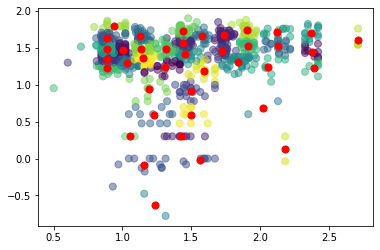

----- cluster  41  ----
[[ 1.3013445   1.52323364]
 [ 1.91549226  1.29277023]
 [ 1.4032662   0.30103   ]
 [ 0.89523138  1.26510188]
 [ 1.70048242  1.65017906]
 [ 1.46724185  0.93012922]
 [ 2.35613241  1.50177837]
 [ 1.44357208  1.61234908]
 [ 1.07740051  1.74448213]
 [ 0.89852481  1.5003669 ]
 [ 1.13399123 -0.5451352 ]
 [ 1.36023403  1.38202721]
 [ 1.91184713  1.54225166]
 [ 2.18055594  0.13162861]
 [ 1.56481133 -0.0167102 ]
 [ 1.16451563  1.2511008 ]
 [ 1.54406491  0.46689075]
 [ 1.75146292  1.4130806 ]
 [ 1.13648109  0.70093579]
 [ 1.45359878  1.75192856]
 [ 0.88371839  1.66102612]
 [ 1.88244776  1.73572981]
 [ 2.70954911  1.60196665]
 [ 1.49593721  1.31265068]
 [ 2.39913911  1.28041143]
 [ 2.11877542  1.66028204]
 [ 2.04032208  0.80720131]
 [ 1.17990956 -0.06448027]
 [ 2.3747529   1.71963506]
 [ 1.14366933  1.60381428]
 [ 0.88451396  1.3814045 ]
 [ 1.00934515  1.32638065]
 [ 1.08243273  1.48735475]
 [ 1.63289436  1.14941208]
 [ 1.15235666  1.40970948]
 [ 1.43071537  0.67838614]
 [ 1

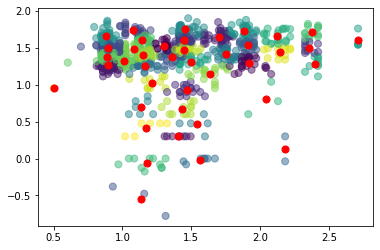

----- cluster  42  ----
[[ 1.58787803  0.90040196]
 [ 1.44543991  1.63104677]
 [ 0.88273977  1.30144929]
 [ 2.37025289  1.70174027]
 [ 1.56481133 -0.0167102 ]
 [ 0.87776413  1.60053069]
 [ 1.45782529  1.34168902]
 [ 1.70806091  1.48280328]
 [ 1.15149797  1.40276822]
 [ 1.42497593  0.30103   ]
 [ 1.14493529  1.65298309]
 [ 1.22222564  1.00445815]
 [ 1.23447559 -0.07876055]
 [ 0.88736779  1.37708069]
 [ 1.89482014  1.73361967]
 [ 1.91107168  1.542736  ]
 [ 2.13980689  1.44706294]
 [ 1.69471338  1.22046032]
 [ 1.39005298  1.49032729]
 [ 2.39312147  1.23359209]
 [ 1.17723897  1.25268521]
 [ 1.20467511  0.61916298]
 [ 1.46934473  0.97481759]
 [ 2.18055594  0.13162861]
 [ 1.00535918  1.48329688]
 [ 1.01249556  1.32748567]
 [ 2.11877542  1.66028204]
 [ 1.13399123 -0.5451352 ]
 [ 0.89567143  1.47558116]
 [ 0.95467467  1.76385128]
 [ 2.70954911  1.60196665]
 [ 1.85961573  1.35175138]
 [ 1.45343938  1.76895263]
 [ 1.48411296  0.59441579]
 [ 2.0208925   0.69010562]
 [ 0.50116885  0.95424251]
 [ 1

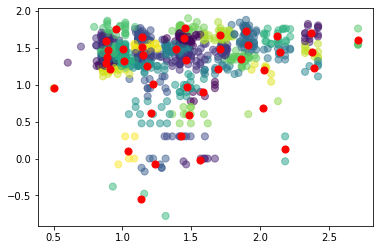

----- cluster  43  ----
[[ 1.7089022   1.6758885 ]
 [ 0.89572443  1.23654923]
 [ 1.42497593  0.30103   ]
 [ 2.13223678  1.46634051]
 [ 1.15966794  1.61429771]
 [ 0.890456    1.4373182 ]
 [ 1.35064209  1.2852646 ]
 [ 1.71787718  1.48168929]
 [ 1.8928394   1.73662523]
 [ 1.35601078  1.49683956]
 [ 2.38088928  1.73623073]
 [ 1.49565373  0.90460348]
 [ 1.15257828  0.46433312]
 [ 1.56481133 -0.0167102 ]
 [ 1.15910638 -0.09078829]
 [ 1.14622257  1.39408573]
 [ 0.88056921  1.69806597]
 [ 2.03571675  1.18463518]
 [ 1.447884    1.75608664]
 [ 1.00258108  1.48363291]
 [ 2.39913911  1.28041143]
 [ 1.69197192  1.26814563]
 [ 2.18055594  0.13162861]
 [ 2.12241972  1.67761197]
 [ 1.19849765  0.73993597]
 [ 1.86754504  1.33959474]
 [ 0.88532678  1.33830807]
 [ 2.70954911  1.60196665]
 [ 1.12566788  1.4992308 ]
 [ 1.23585117 -0.62761454]
 [ 1.25596751  1.01174714]
 [ 1.44839069  1.61624064]
 [ 0.88784391  1.55233447]
 [ 2.35361081  1.52287512]
 [ 1.47234654  0.59505281]
 [ 1.07320214  1.74675774]
 [ 1

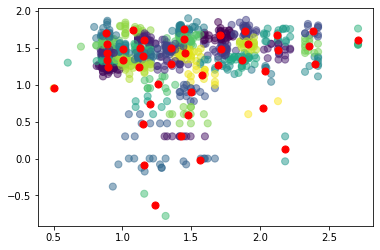

----- cluster  44  ----
[[ 1.59327744  1.65490387]
 [ 0.92965966  1.22630392]
 [ 1.46110234  0.94006563]
 [ 0.9990834   1.48793735]
 [ 2.35613241  1.50177837]
 [ 1.56481133 -0.0167102 ]
 [ 1.93123292  1.39617611]
 [ 1.32208457  1.47486063]
 [ 1.90248553  1.7375706 ]
 [ 1.15393832  0.5015695 ]
 [ 0.89379953  1.41511011]
 [ 1.13399123 -0.5451352 ]
 [ 1.58318183  1.22609177]
 [ 1.06366553  1.75075282]
 [ 1.17755681  1.24295988]
 [ 1.53231499  0.43309844]
 [ 2.11877542  1.66028204]
 [ 1.13339969  1.49013934]
 [ 1.78727898  1.32716913]
 [ 1.09829486  1.37536891]
 [ 1.7288829   1.49210409]
 [ 2.0208925   0.69010562]
 [ 1.43392515  1.6358701 ]
 [ 0.8835917   1.68055216]
 [ 2.3747529   1.71963506]
 [ 1.17990956 -0.06448027]
 [ 2.39913911  1.28041143]
 [ 0.89426637  1.32044242]
 [ 1.44304993  0.6725149 ]
 [ 1.4032662   0.30103   ]
 [ 2.18055594  0.13162861]
 [ 2.15634323  1.45166934]
 [ 1.44442344  1.76939748]
 [ 1.42877661  1.34593858]
 [ 0.8848938   1.52730152]
 [ 1.20896426  0.93661203]
 [ 2

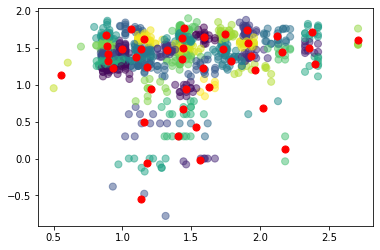

----- cluster  45  ----
[[ 1.89200996  1.341684  ]
 [ 0.89061146  1.41020253]
 [ 1.19060624  0.53066643]
 [ 1.43789355  1.60772616]
 [ 1.19882153  1.19643932]
 [ 2.38088928  1.73623073]
 [ 1.24810187 -0.07216366]
 [ 1.31030666  1.48903948]
 [ 1.59440919  1.1706861 ]
 [ 1.8985484   1.74026142]
 [ 2.39913911  1.28041143]
 [ 1.03882301  1.76399452]
 [ 1.48969621  0.91682378]
 [ 2.10892102  1.55501077]
 [ 2.18055594  0.13162861]
 [ 0.89056399  1.3236412 ]
 [ 1.00620305  1.45378532]
 [ 1.74531559  1.68999413]
 [ 1.44488045  1.46279254]
 [ 0.88509487  1.64173384]
 [ 1.41031009  1.31343648]
 [ 1.05455556  1.30289213]
 [ 1.47234654  0.59505281]
 [ 0.8966653   1.2262326 ]
 [ 1.42497593  0.30103   ]
 [ 1.56481133 -0.0167102 ]
 [ 1.13399123 -0.5451352 ]
 [ 1.1393744   1.6017317 ]
 [ 1.59327744  1.65490387]
 [ 1.91312744  1.54753203]
 [ 2.0208925   0.69010562]
 [ 1.06057302 -0.05103434]
 [ 1.7387156   1.33771377]
 [ 2.70954911  1.60196665]
 [ 1.98368887  1.17691339]
 [ 0.50116885  0.95424251]
 [ 1

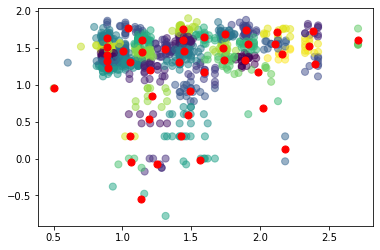

----- cluster  46  ----
[[ 1.00949275  1.33438461]
 [ 1.92464256  1.5463408 ]
 [ 1.00836795 -0.11484378]
 [ 1.41904829  1.6275091 ]
 [ 1.14222703  1.56739832]
 [ 1.47234654  0.59505281]
 [ 2.70954911  1.60196665]
 [ 2.2288629   1.46102077]
 [ 0.88775397  1.50374439]
 [ 1.58318183  1.22609177]
 [ 1.13708226  1.42627238]
 [ 1.56481133 -0.0167102 ]
 [ 1.8985484   1.74026142]
 [ 1.23431837  0.95245811]
 [ 1.23447559 -0.07876055]
 [ 2.04002446  1.23230169]
 [ 1.31597816  1.47565999]
 [ 0.94026021  1.80295415]
 [ 2.18055594  0.13162861]
 [ 0.88973131  1.32303369]
 [ 2.37329474  1.69265041]
 [ 1.7279303   1.47547152]
 [ 1.17439276  0.41842417]
 [ 1.78603876  1.2642845 ]
 [ 1.74044262  1.68188115]
 [ 2.40052904  1.30929315]
 [ 1.24867088  1.23442913]
 [ 0.88790116  1.6286754 ]
 [ 2.11939319  1.65499959]
 [ 1.55019302  1.61533509]
 [ 1.11733055  1.70365571]
 [ 1.23585117 -0.62761454]
 [ 1.42497593  0.30103   ]
 [ 2.0208925   0.69010562]
 [ 1.65114578  1.01870411]
 [ 0.89061146  1.41020253]
 [ 1

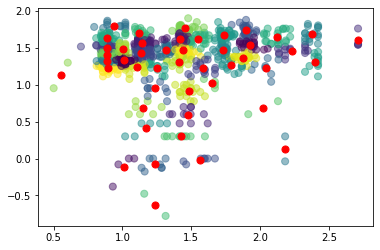

----- cluster  47  ----
[[ 1.13769114  1.25518608]
 [ 1.92467512  1.55605199]
 [ 1.56481133 -0.0167102 ]
 [ 1.44026435  1.54518565]
 [ 1.13868907  1.65111059]
 [ 0.88294768  1.31501424]
 [ 1.4729227   0.7740731 ]
 [ 2.39913911  1.28041143]
 [ 1.80756391  1.23748744]
 [ 2.38088928  1.73623073]
 [ 1.42497593  0.30103   ]
 [ 1.17990956 -0.06448027]
 [ 1.67188884  1.59745661]
 [ 0.88242847  1.59685875]
 [ 1.15050862  1.41834048]
 [ 1.58195461  1.23639241]
 [ 0.93837289  1.7645878 ]
 [ 1.90248553  1.7375706 ]
 [ 1.08390582  1.50106136]
 [ 1.19578657  0.9484928 ]
 [ 1.44325749  1.64490664]
 [ 2.13522376  1.4726429 ]
 [ 1.74244856  1.42293259]
 [ 0.90494698  1.22237378]
 [ 1.44899494  1.42813816]
 [ 2.18055594  0.13162861]
 [ 0.90546286  1.48148442]
 [ 2.70954911  1.60196665]
 [ 1.21995872  0.57424773]
 [ 1.51325748  0.97569847]
 [ 1.89678362  1.36673366]
 [ 1.56089918  1.78793523]
 [ 2.03571675  1.18463518]
 [ 1.04431692 -0.42867059]
 [ 1.31625965  1.4910178 ]
 [ 2.12904391  1.6956735 ]
 [ 1

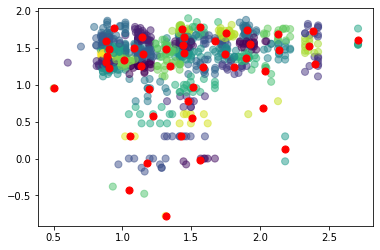

----- cluster  48  ----
[[ 1.21919512  1.23168647]
 [ 1.89849541  1.7535764 ]
 [ 0.899833    1.4189053 ]
 [ 1.42497593  0.30103   ]
 [ 1.1167886   1.69079068]
 [ 1.92834671  1.40920196]
 [ 1.45089175  1.55538178]
 [ 2.35361081  1.52287512]
 [ 1.48969621  0.91682378]
 [ 0.88659076  1.33280441]
 [ 1.15910638 -0.09078829]
 [ 2.18055594  0.13162861]
 [ 0.88757225  1.63185823]
 [ 1.60336843  1.14584012]
 [ 1.4452378   1.77187057]
 [ 1.14503298  1.41090779]
 [ 1.56481133 -0.0167102 ]
 [ 1.16398734  1.57744073]
 [ 1.58875555  1.65314529]
 [ 2.15806701  1.73682236]
 [ 1.90675438  1.57901174]
 [ 1.07797528  1.49009685]
 [ 1.11239693  0.38907563]
 [ 2.38088928  1.73623073]
 [ 1.8161704   1.29889236]
 [ 1.23585117 -0.62761454]
 [ 1.36885711  0.5187675 ]
 [ 1.0411336   1.3031154 ]
 [ 1.41890497  1.65376191]
 [ 2.70954911  1.60196665]
 [ 2.0208925   0.69010562]
 [ 0.89572443  1.23654923]
 [ 1.74539046  1.68646093]
 [ 1.20702481  0.98256111]
 [ 2.39913911  1.28041143]
 [ 0.89527006  1.51433633]
 [ 1

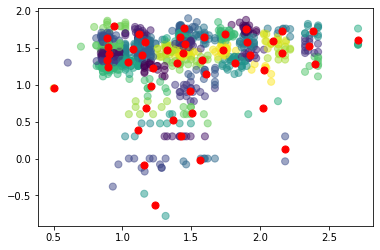

----- cluster  49  ----
[[ 0.88933917  1.35580454]
 [ 1.7279303   1.47547152]
 [ 1.42497593  0.30103   ]
 [ 2.38088928  1.73623073]
 [ 1.42744809  1.35397718]
 [ 1.4246939   0.95822895]
 [ 1.142595    1.64217543]
 [ 1.95967205  1.21201659]
 [ 1.89769625  1.74348545]
 [ 1.44092103  1.62224135]
 [ 1.03440015 -0.02639954]
 [ 2.39913911  1.28041143]
 [ 1.14125405  1.39932656]
 [ 0.88716044  1.615237  ]
 [ 1.56481133 -0.0167102 ]
 [ 1.30145784  0.57656541]
 [ 2.14705312  1.4792952 ]
 [ 1.82399826  1.35148641]
 [ 0.89435921  1.23620881]
 [ 1.44021135  1.75564396]
 [ 1.1892012   1.20746429]
 [ 0.88971432  1.48293292]
 [ 1.72703725  1.22931152]
 [ 1.61768053  0.98869149]
 [ 2.0208925   0.69010562]
 [ 1.31333984 -0.7780644 ]
 [ 1.23447559 -0.07876055]
 [ 2.70954911  1.60196665]
 [ 1.92174197  1.5681959 ]
 [ 0.87797895  1.76524896]
 [ 1.18123084  0.84265617]
 [ 1.02774201  1.30644247]
 [ 2.18055594  0.13162861]
 [ 1.4359553   1.49201557]
 [ 1.49156709  0.77356333]
 [ 1.54717582  1.234643  ]
 [ 0

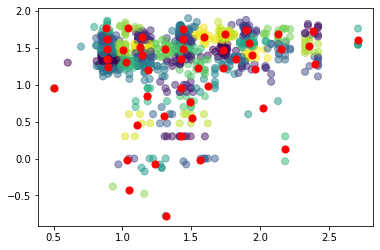

In [71]:


for cluster in range(5, 50):
    print("----- cluster ", cluster ," ----")
    kmeans = KMeans(n_clusters=cluster).fit(points)
    centroids = kmeans.cluster_centers_
    print(centroids)
    plt.scatter(points["'fare'"], points["'age'"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()
    

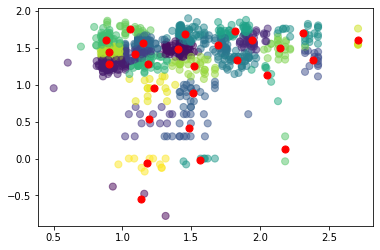

In [72]:
kmeans = KMeans(n_clusters=27).fit(points)
centroids = kmeans.cluster_centers_
plt.scatter(points["'fare'"], points["'age'"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [73]:
import math
["Fare: " + str(math.pow(10, centroid[0])) +  " - Age: " +  str(math.pow(10, centroid[1])) for centroid in centroids]

['Fare: 13.614171854854613 - Age: 0.2850130887063675',
 'Fare: 25.36471172685712 - Age: 30.293405573569075',
 'Fare: 7.944066666299346 - Age: 19.36952032062056',
 'Fare: 86.63545327107583 - Age: 40.17981186013159',
 'Fare: 15.649884940963089 - Age: 3.4057614775612457',
 'Fare: 12.375641189742817 - Age: 26.26450324609141',
 'Fare: 243.14149617919765 - Age: 21.871803700126893',
 'Fare: 30.63035425013231 - Age: 2.634166108404895',
 'Fare: 32.26372256366604 - Age: 7.8311241325145025',
 'Fare: 14.127716251860619 - Age: 37.33152706209799',
 'Fare: 49.53291155846338 - Age: 34.87283832428549',
 'Fare: 68.22759569082812 - Age: 21.630924681699998',
 'Fare: 28.54989586339707 - Age: 48.965404992118565',
 'Fare: 205.51862107756992 - Age: 49.91538131100203',
 'Fare: 36.71227791460026 - Age: 0.9622541701420471',
 'Fare: 65.49684549737087 - Age: 53.944875912043095',
 'Fare: 111.94462739272556 - Age: 13.3833872067451',
 'Fare: 15.229805799621921 - Age: 19.13690669926506',
 'Fare: 7.646568241278432 - Ag